In [55]:
import pyaudio
import wave
def get_audio(sec):
    #创建对象
    p = pyaudio.PyAudio()
    #创建流：采样位，声道数，缓冲区大小，input = True,framerate:采样频率,nchannels:声道数,nframes:采样点数
    stream = p.open(format = pyaudio.paInt16,channels = 1,rate = 16000,input = True,frames_per_buffer = 1024)
    #创建式打开音频文件
    wf  = wave.open('zuoye.wav','wb')
    #设置音频文件的属性：声道数，采样位，采样频率
    wf.setnchannels(1)
    wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setframerate(16000)
    print('开始录音')
    for i in range(int(16000*sec/1024)):
        data = stream.read(1024)
        wf.writeframes(data)
    print('录音结束')
    stream.stop_stream()
    stream.close()
    p.terminate()
    wf.close()
    return 'zuoye.wav'
get_audio(6)

开始录音
录音结束


'zuoye.wav'

In [56]:
import pyaudio
import wave
#播放音频
def play_audio(file):
    p = pyaudio.PyAudio()
    wf = wave.open(file,'rb')
    stream = p.open(format = p.get_format_from_width(wf.getsampwidth()),channels = wf.getnchannels(),rate = wf.getframerate(),output = True)
    data = wf.readframes(1024)
    while len(data)>0:
        stream.write(data)
        data = wf.readframes(1024)
    stream.stop_stream()
    stream.close()
    p.terminate()
    wf.close()
    
play_audio('zuoye.wav')

In [62]:
#画出波形图
import wave
import matplotlib.pyplot as plt
import numpy as np
import os
f = wave.open(r"zuoye.wav", "rb")
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
strData = f.readframes(nframes)#读取音频，字符串格式
waveData = waveData*1.0/(max(abs(waveData)))#wave幅值归一化
time = np.arange(0,nframes)*(1.0 / framerate)#计算音频总时长
fig,ax1 = plt.subplots()
ax1.plot(time,waveData)
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Amplitude")
ax1.set_title("Single channel wavedata")
ax1.grid('on')#标尺，on：有，off:无。

C:\Users\Qiao\AppData\Local\Temp/ipykernel_13632/4234986641.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  waveData = np.fromstring(str_data, dtype=np.short)


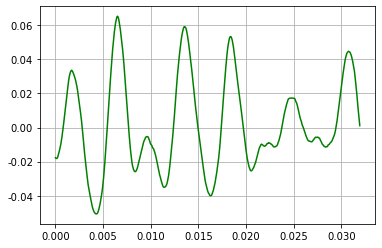

<Figure size 720x288 with 0 Axes>

In [61]:
import numpy as np
import wave
import matplotlib.pyplot as plt
wlen=512
inc=128
f = wave.open(r"zuoye.wav", "rb")
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes)
waveData = np.fromstring(str_data, dtype=np.short)
waveData = waveData*1.0/(max(abs(waveData)))
time = np.arange(0, wlen) * (1.0 / framerate)
signal_length=len(waveData) #信号总长度
if signal_length<=wlen: #若信号长度小于一个帧的长度，则帧数定义为1
        nf=1
else: #否则，计算帧的总长度
        nf=int(np.ceil((1.0*signal_length-wlen+inc)/inc))
pad_length=int((nf-1)*inc+wlen) #所有帧加起来总的铺平后的长度
zeros=np.zeros((pad_length-signal_length,)) #不够的长度使用0填补，类似于FFT中的扩充数组操作
pad_signal=np.concatenate((waveData,zeros)) #填补后的信号记为pad_signal
indices=np.tile(np.arange(0,wlen),(nf,1))+np.tile(np.arange(0,nf*inc,inc),(wlen,1)).T  #相当于对所有帧的时间点进行抽取，得到nf*nw长度的矩阵
indices=np.array(indices,dtype=np.int32) #将indices转化为矩阵
frames=pad_signal[indices] #得到帧信号
a=frames[30:31]
fig,ax1 = plt.subplots()
plt.figure(figsize=(10,4))
ax1.plot(time,a[0],c="g")
ax1.grid()
plt.show()


In [18]:
#hanning窗
import pylab as pl
import scipy.signal as signal
pl.figure(figsize=(6,2))
pl.plot(signal.windows.hann(512))

In [63]:
#加上hanning窗的图像
import numpy as np
import wave
import matplotlib.pyplot as plt
wlen=512
inc=128
f = wave.open(r"zuoye.wav", "rb")
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
str_data = f.readframes(nframes)
waveData = waveData*1.0/(max(abs(waveData)))
print(waveData[:10])
time = np.arange(0, wlen) * (1.0 / framerate)
signal_length=len(waveData) #信号总长度
if signal_length<=wlen: #若信号长度小于一个帧的长度，则帧数定义为1
        nf=1
else: #否则，计算帧的总长度
        nf=int(np.ceil((1.0*signal_length-wlen+inc)/inc))
pad_length=int((nf-1)*inc+wlen) #所有帧加起来总的铺平后的长度
zeros=np.zeros((pad_length-signal_length,)) #不够的长度使用0填补，类似于FFT中的扩充数组操作
pad_signal=np.concatenate((waveData,zeros)) #填补后的信号记为pad_signal
print(indices[:2])
indices=np.tile(np.arange(0,wlen),(nf,1))+np.tile(np.arange(0,nf*inc,inc),(wlen,1)).T  #相当于对所有帧的时间点进行抽取，得到nf*nw长度的矩阵
indices=np.array(indices,dtype=np.int32) #将indices转化为矩阵
frames=pad_signal[indices] #得到帧信号
a=frames[30:31]
windown=np.hanning(wlen)  #调用汉明窗
b=a[0]*windown
plt.figure(figsize=(10,4))
plt.plot(time,b,c="g")
plt.grid()

[ 0.00000000e+00  0.00000000e+00 -3.12265801e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.12265801e-05
  0.00000000e+00  0.00000000e+00]
[[  0   1   2 ... 509 510 511]
 [128 129 130 ... 637 638 639]]


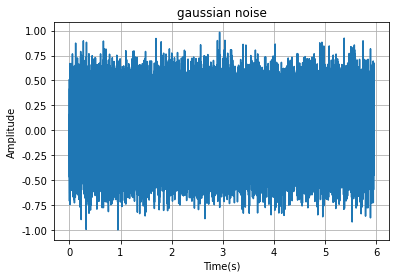

In [64]:
#添加高斯噪声
gaussian_noise = np.random.normal(0,2,len(waveData))  # 生成高斯白噪声
data_noise = waveData[0]+0.02*gaussian_noise#添加噪声
noiseData1 = data_noise*1.0/(max(abs(data_noise)))#wave幅值归一化
time = np.arange(0,nframes)*(1.0 / framerate)#计算音频总时长
plt.plot(time,noiseData1)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("gaussian noise")
plt.grid('on')

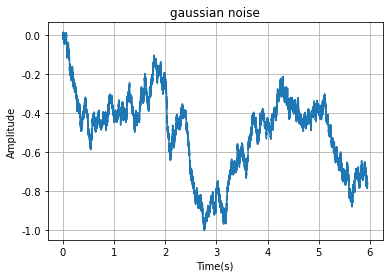

In [65]:
#添加布朗噪声
brownian_noise = np.cumsum(np.random.uniform(-1,1,len(waveData)))
brownian_noise /= max(abs(brownian_noise)) # 生成布朗噪声
data_noise = waveData[0]+0.01*brownian_noise#添加噪声
noiseData1 = data_noise*1.0/(max(abs(data_noise)))#wave幅值归一化
time = np.arange(0,nframes)*(1.0 / framerate)#计算音频总时长
plt.plot(time,noiseData1)
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.title("gaussian noise")
plt.grid('on')

In [85]:
#自相关
m = 50
n = len(waveData)
variance = waveData.var()
x = waveData-waveData.mean()
result = np.correlate(x,x,mode = 'valid')[-n+1:-n+m+1]/(variance*(np.arange(n-1,n-1-m,-1)))

ValueError: object too deep for desired array

SyntaxError: Missing parentheses in call to 'print'. Did you mean print('size is ', size)? (Temp/ipykernel_13632/29281138.py, line 14)

C:\Users\Qiao\AppData\Local\Temp/ipykernel_13632/988200672.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  waveData = np.fromstring(str_data, dtype=np.short)


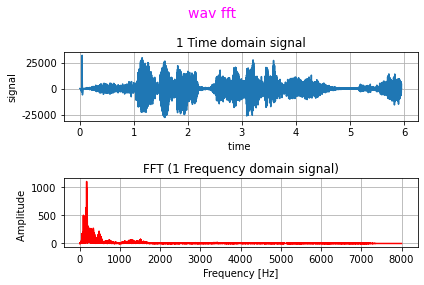

In [58]:
#信号的快速傅里叶变化
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import wave

class Wav_FFT(object):
    def __init__(self, wav_path=r"zuoye.wav"):
        self.path = wav_path
        
    def read_wav(self):
        with  wave.open(self.path, "rb") as f:
            parameters = f.getparams()
            self.nchannels, self.sampwidth, self.framerate, self.nframes = parameters[:4]            
            # 读取波形数据
            str_data = f.readframes(self.nframes)
            waveData = np.fromstring(str_data, dtype=np.short)
            waveData.shape = -1, self.nchannels
            self.waveData = waveData.T
            
    def FFT(self):
        yf = np.fft.fft(self.waveData)# FFT
        bias =  (yf[:, 0] / self.nframes).real
        yf_amplitude = np.abs(yf)* (2.0/self.nframes)
        yf_amplitude[:, 0] = bias #直流分量(0 Hz处)修正
        self.yf_amplitude = yf_amplitude[:, 0:self.nframes//2]#有效信息只有一半
    
    def plot(self):
        matplotlib.rcParams["axes.unicode_minus"] = False
        self.time = np.arange(0, self.nframes) * (1.0 / self.framerate)
        self.freq = np.arange(0,self.nframes//2) * self.framerate / self.nframes #实际频率
        for i in range(self.nchannels):
            plt.subplot(2, self.nchannels, i+1)
            plt.plot(self.time, self.waveData[i,:])
            plt.xlabel("time ")
            plt.ylabel("signal")
            plt.grid()
            plt.title("%d Time domain signal" %(i+1))
            plt.subplot(2, self.nchannels, self.nchannels+i+1)
            plt.plot(self.freq, self.yf_amplitude[i, :], "r-")
            plt.xlabel("Frequency [Hz]")
            plt.ylabel("Amplitude ")
            plt.grid()
            plt.title("FFT (%d Frequency domain signal)"%(i+1))    
        plt.suptitle("wav fft", fontsize =14, color ="magenta")
        plt.tight_layout()
        plt.show()        
wav = Wav_FFT(wav_path=r"zuoye.wav")
wav.read_wav()
wav.FFT()
wav.plot()

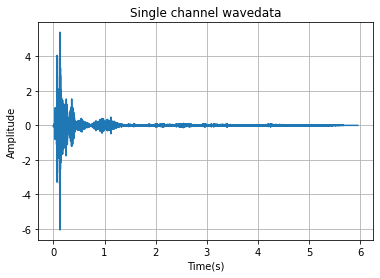

In [68]:
#余弦变换（包）
import cv2
import wave
import matplotlib.pyplot as plt
import numpy as np
import os
f = wave.open(r"zuoye.wav", "rb")
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
strData = f.readframes(nframes)#读取音频，字符串格式
waveData = waveData*1.0/(max(abs(waveData)))#wave幅值归一化
time = np.arange(0,nframes)*(1.0 / framerate)#计算音频总时长
waveData = cv2.dct(waveData)
fig,ax1 = plt.subplots()
ax1.plot(time,waveData)
ax1.set_xlabel("Time(s)")
ax1.set_ylabel("Amplitude")
ax1.set_title("Single channel wavedata")
ax1.grid('on')#标尺，on：有，off:无。
plt.show()


MemoryError: Unable to allocate 67.6 GiB for an array with shape (95232, 95232) and data type float64